# Reading and Writing Audio Files with PySoundFile

[back to overview page](index.ipynb)

There are many libraries for handling audio files with Python (see overview page), but the best one is probably [PySoundFile](http://github.com/bastibe/PySoundFile).

Full documentation including installation instructions is available at http://pysoundfile.readthedocs.org/.

Advantages: 

* supports many file formats (thanks to libsndfile)
  * WAV, OGG, FLAC and many more
  * see [bottom of this notebook](#Available-Formats) for full list of supported formats
* supports 24-bit PCM and 32-bit floating point WAV files
* WAVEX support
* can read parts of audio files
* automatic type conversion and normalization
* works in CPython 2.x and 3.x and in PyPy as well

Disadvantages:

* needs NumPy (which isn't really a problem at all)
* no MP3 support

## Reading

This is the quickest way to load a WAV file into a NumPy array:

In [1]:
import soundfile as sf
sig, samplerate = sf.read('data/test_wav_pcm16.wav')

That's all. Easy, isn't it?

But let's have a closer look ...

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

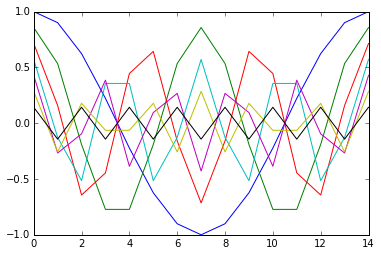

In [3]:
plt.plot(sig);

Looking good!

In most cases `sf.read()` is all you need, but for some advanced use cases, you might want to use a `SoundFile` object instead:

In [4]:
f = sf.SoundFile('data/test_wav_pcm16.wav')

In [5]:
len(f), f.channels, f.samplerate

(15, 7, 44100)

In [6]:
f.format, f.subtype, f.endian

('WAV', 'PCM_16', 'FILE')

In [7]:
sig.shape

(15, 7)

In [8]:
test = f.read()
test.shape

(15, 7)

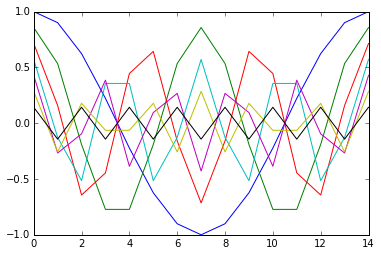

In [9]:
plt.plot(test);

In [10]:
(test == sig).all()

True

As you can see, you get the same data as with `sf.read()`.

In [11]:
# TODO: read mono file

24-bit files work:

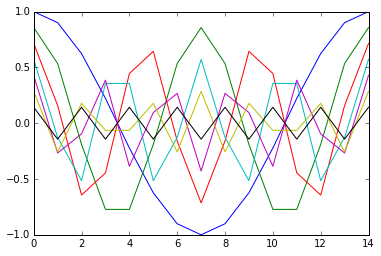

In [12]:
sig, samplerate = sf.read('data/test_wav_pcm24.wav')
plt.plot(sig);

WAVEX is supported:

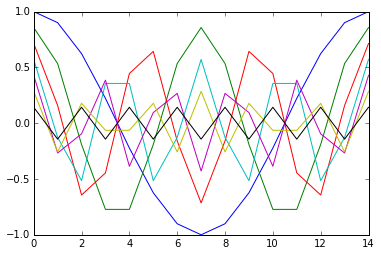

In [13]:
sig, samplerate = sf.read('data/test_wavex_pcm16.wav')
plt.plot(sig);

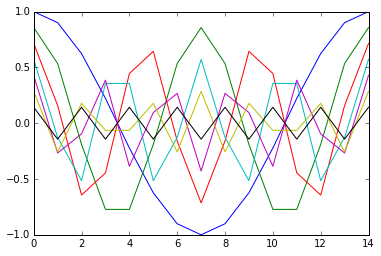

In [14]:
sig, samplerate = sf.read('data/test_wavex_pcm24.wav')
plt.plot(sig);

32-bit float files work:

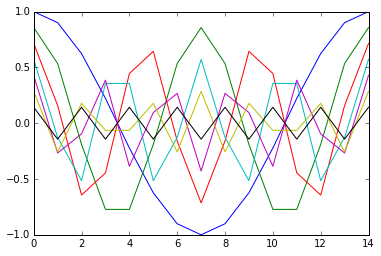

In [15]:
sig, samplerate = sf.read('data/test_wav_float32.wav')
plt.plot(sig);

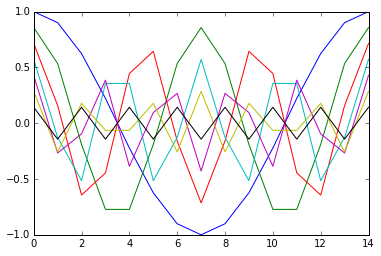

In [16]:
sig, samplerate = sf.read('data/test_wavex_float32.wav')
plt.plot(sig);

It also works in PyPy:

In [17]:
%%pypy
import soundfile as sf

sig, samplerate = sf.read('data/test_wav_pcm16.wav')

sig2, samplerate2 = sf.read('data/test_wavex_pcm16.wav')

print "Everything is fine:", (sig == sig2).all() and samplerate == samplerate2

import sys
print(sys.version)

Everything is fine: True
2.7.8 (2.4.0+dfsg-3, Dec 20 2014, 13:30:46)
[PyPy 2.4.0 with GCC 4.9.2]


## Writing

In [18]:
# TODO!

## Available Formats

In [19]:
sf.available_formats()

{'AIFF': 'AIFF (Apple/SGI)',
 'AU': 'AU (Sun/NeXT)',
 'AVR': 'AVR (Audio Visual Research)',
 'CAF': 'CAF (Apple Core Audio File)',
 'FLAC': 'FLAC (FLAC Lossless Audio Codec)',
 'HTK': 'HTK (HMM Tool Kit)',
 'IRCAM': 'SF (Berkeley/IRCAM/CARL)',
 'MAT4': 'MAT4 (GNU Octave 2.0 / Matlab 4.2)',
 'MAT5': 'MAT5 (GNU Octave 2.1 / Matlab 5.0)',
 'MPC2K': 'MPC (Akai MPC 2k)',
 'NIST': 'WAV (NIST Sphere)',
 'OGG': 'OGG (OGG Container format)',
 'PAF': 'PAF (Ensoniq PARIS)',
 'PVF': 'PVF (Portable Voice Format)',
 'RAW': 'RAW (header-less)',
 'RF64': 'RF64 (RIFF 64)',
 'SD2': 'SD2 (Sound Designer II)',
 'SDS': 'SDS (Midi Sample Dump Standard)',
 'SVX': 'IFF (Amiga IFF/SVX8/SV16)',
 'VOC': 'VOC (Creative Labs)',
 'W64': 'W64 (SoundFoundry WAVE 64)',
 'WAV': 'WAV (Microsoft)',
 'WAVEX': 'WAVEX (Microsoft)',
 'WVE': 'WVE (Psion Series 3)',
 'XI': 'XI (FastTracker 2)'}

In [20]:
sf.available_subtypes()

{'ALAW': 'A-Law',
 'DOUBLE': '64 bit float',
 'DPCM_16': '16 bit DPCM',
 'DPCM_8': '8 bit DPCM',
 'DWVW_12': '12 bit DWVW',
 'DWVW_16': '16 bit DWVW',
 'DWVW_24': '24 bit DWVW',
 'FLOAT': '32 bit float',
 'G721_32': '32kbs G721 ADPCM',
 'G723_24': '24kbs G723 ADPCM',
 'GSM610': 'GSM 6.10',
 'IMA_ADPCM': 'IMA ADPCM',
 'MS_ADPCM': 'Microsoft ADPCM',
 'PCM_16': 'Signed 16 bit PCM',
 'PCM_24': 'Signed 24 bit PCM',
 'PCM_32': 'Signed 32 bit PCM',
 'PCM_S8': 'Signed 8 bit PCM',
 'PCM_U8': 'Unsigned 8 bit PCM',
 'ULAW': 'U-Law',
 'VORBIS': 'Vorbis',
 'VOX_ADPCM': 'VOX ADPCM'}

## Version Info

In [21]:
print("PySoundFile version:", sf.__version__)

import sys
print("Python version:", sys.version)

PySoundFile version: 0.7.0
Python version: 3.4.3+ (default, May  7 2015, 23:10:14) 
[GCC 4.9.2]


<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span resource="[_:publisher]" rel="dct:publisher">
    <span property="dct:title">Matthias Geier</span></span>
  has waived all copyright and related or neighboring rights to
  this work.
</p>